## Table of Contents

1. [Problem Statement](#section1)
2. [Importing Packages](#section2)
3. [Data Loading and Description](#section3)
   - 3.1 [Description of the dataset](#section301)
4. [Data Processing](#section4)
   - 4.1 [Pandas Profiling - Before Processing](#section401)
   - 4.2 [Data Pre-Processing](#section402)
     - 4.2.1 [Checking null values in all Columns](#section40201)
     - 4.2.2 [Drop Unrelated Column](#section40202)
     - 4.2.3 [Label-Encoding](#section40203)
   - 4.3 [Pandas Profiling - After Processing](#section403)
5. [Exploratory Data Analysis](#section5)
   - 5.1 [Correlation Matrix](#section501)
   - 5.2 [Relation between Mushroom Properties](#section502)
6. [Data train/test split](#section6)
    - 6.1 [Split Dataset into X & Y variables](#section601)
    - 6.2 [Train-Test Split](#section602)
7. [Modelling using scikit learn](#section7)
   - 7.1 [Logistic Regression](#section701)
       - 7.1.1 [Model Creation](#section70101)
       - 7.1.2 [Model Evaulation](#section70102)
   - 7.2 [Decision Tree Classifier](#section702)
       - 7.2.1 [Model Creation](#section70201)
       - 7.2.2 [Model Evaulation](#section70202)
       - 7.2.3 [Visualize Decision Tree](#section70203)
   - 7.3 [Random Forest Classifier](#section703)
       - 7.3.1 [Model Creation](#section70301)
       - 7.3.2 [Model Evaulation](#section70302)
   - 7.4 [Decision Tree Classifier with GridSearch](#section704)
       - 7.4.1 [Model Creation with Hyper-Parameter Tuning](#section70401)
       - 7.4.2 [Model Evaluation](#section70402)
   - 7.5 [Random Forest Classifier with RandomizedSearch](#section705)
       - 7.4.1 [Model Creation with Hyper-Parameter Tuning](#section70501)
       - 7.4.2 [Model Evaluation](#section70502)
8. [Comparison between AUC-ROC Curve for Different Models](#section8)
   - 8.1 [Logistic Regression - AUC-ROC Curve](#section801)
   - 8.2 [Decision Tree - AUC-ROC Curve](#section802)
   - 8.3 [Random Forest - AUC-ROC Curve](#section803)
   - 8.4 [Decision Tree with Gridsearch - AUC-ROC Curve](#section804)
   - 8.5 [Random Forest with RandomizedSearch - AUC-ROC Curve](#section805)
9. [Conclusions](#section9)

<a id=section1></a>
## 1. Problem Statement
- What types of machine learning models perform best on this dataset?
- Which features are most indicative of a poisonous mushroom?

<img src = 'Mushrooms_Img1.jpg'>

<a id=section2></a>
## 2. Importing Packages

In [1]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [3]:
!pip install plotly --upgrade

Requirement already up-to-date: plotly in c:\anaconda\lib\site-packages (4.10.0)


In [4]:
# Install chart_studio, please use this command. 

!pip install chart-studio --upgrade

Requirement already up-to-date: chart-studio in c:\anaconda\lib\site-packages (1.1.0)


In [5]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

<a id=section3></a>
## 3. Loading Data

In [6]:
# Importing Mushrooms dataset
df_mushroomsData = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/mushrooms.csv')
df_mushroomsData.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


<a id=section301></a>
### Description of the Dataset
- This dataset provides information about **Mushrooms's**.
<table style="border: 1px solid #900; width:900">
    <tr style="border: 1px solid #900">
    <th style="border: 1px solid #900; text-align:center"> Column Name </th>
    <th style="text-align:center"> Description </th>
    </tr>    
    <tr>
    <td style="border: 1px solid #900;text-align:left"> class </td>
    <td style="border: 1px solid #900;text-align:left"> edible=e, poisonous=p </td>
    </tr>    
     <tr>
    <td style="border: 1px solid #900;text-align:left"> cap-shape  </td>
    <td style="border: 1px solid #900;text-align:left"> bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s. </td>
    </tr>    
     <tr>
    <td style="border: 1px solid #900;text-align:left"> cap-surface </td>
    <td style="border: 1px solid #900;text-align:left"> fibrous=f, grooves=g, scaly=y, smooth=s </td>
    </tr>    
     <tr>
    <td style="border: 1px solid #900;text-align:left"> cap-color </td>
    <td style="border: 1px solid #900;text-align:left"> brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y </td>
    </tr>
     <tr>
    <td style="border: 1px solid #900;text-align:left"> bruises </td>
    <td style="border: 1px solid #900;text-align:left"> bruises=t, no=f </td>
    </tr>
     <tr>
    <td style="border: 1px solid #900;text-align:left"> odor </td>
    <td style="border: 1px solid #900;text-align:left"> almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s </td>
    </tr>
     <tr>
    <td style="border: 1px solid #900;text-align:left"> gill-attachment </td>
    <td style="border: 1px solid #900;text-align:left"> attached=a, free=f </td>
    </tr>
     <tr>
    <td style="border: 1px solid #900;text-align:left"> gill-spacing </td>
    <td style="border: 1px solid #900;text-align:left"> close=c, crowded=w </td>
    </tr>
     <tr>
    <td style="border: 1px solid #900;text-align:left"> gill-size </td>
    <td style="border: 1px solid #900;text-align:left"> broad=b, narrow=n </td>
    </tr>
     <tr>
    <td style="border: 1px solid #900;text-align:left"> gill-color </td>
    <td style="border: 1px solid #900;text-align:left"> black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y </td>
    </tr>
     <tr>
    <td style="border: 1px solid #900;text-align:left"> stalk-shape </td>
    <td style="border: 1px solid #900;text-align:left"> enlarging=e, tapering=t </td>
    </tr>
     <tr>
    <td style="border: 1px solid #900;text-align:left"> stalk-root </td>
    <td style="border: 1px solid #900;text-align:left"> bulbous=b, club=c, equal=e, rhizomorphs=z, rooted=r </td>
    </tr>
         <tr>
    <td style="border: 1px solid #900;text-align:left"> stalk-surface-above-ring </td>
    <td style="border: 1px solid #900;text-align:left"> fibrous=f, scaly=y, silky=k, smooth=s </td>
    </tr>
     <tr>
    <td style="border: 1px solid #900;text-align:left"> stalk-surface-below-ring </td>
    <td style="border: 1px solid #900;text-align:left"> fibrous=f, scaly=y, silky=k, smooth=s </td>
    </tr>
     <tr>
    <td style="border: 1px solid #900;text-align:left"> stalk-color-above-ring </td>
    <td style="border: 1px solid #900;text-align:left"> brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y </td>
    </tr>
     <tr>
    <td style="border: 1px solid #900;text-align:left"> stalk-color-below-ring </td>
    <td style="border: 1px solid #900;text-align:left"> brown=n, buff=b,  cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y </td>
    </tr>
     <tr>
    <td style="border: 1px solid #900;text-align:left"> veil-type </td>
    <td style="border: 1px solid #900;text-align:left"> partial=p </td>
    </tr>
     <tr>
    <td style="border: 1px solid #900;text-align:left"> veil-color </td>
    <td style="border: 1px solid #900;text-align:left"> brown=n, orange=o, white=w, yellow=y </td>
    </tr>
    <tr>
    <td style="border: 1px solid #900;text-align:left"> ring-number </td>
    <td style="border: 1px solid #900;text-align:left"> none=n, one=o, two=t </td>
    </tr>
     <tr>
    <td style="border: 1px solid #900;text-align:left"> ring-type </td>
    <td style="border: 1px solid #900;text-align:left"> evanescent=e, flaring=f, large=l, none=n, pendant=p </td>
    </tr>
     <tr>
    <td style="border: 1px solid #900;text-align:left"> spore-print-color </td>
    <td style="border: 1px solid #900;text-align:left"> black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y </td>
    </tr>
     <tr>
    <td style="border: 1px solid #900;text-align:left"> population </td>
    <td style="border: 1px solid #900;text-align:left"> abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y </td>
    </tr>
     <tr>
    <td style="border: 1px solid #900;text-align:left"> habitat </td>
    <td style="border: 1px solid #900;text-align:left"> grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d </td>
    </tr>
</table>

In [7]:
df_mushroomsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

- **Info** gives following information
    - There are total **8124** rows & **23** columns in given data
    - All the 23 columns are of **Object/String** datatype

In [8]:
df_mushroomsData.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


- From **Describe** function, We following information
    - All columns in given dataset are categorical
    - All columns have only alphabets as data, these alphabets have a specific meaning related to that column
    - There is a ***Class*** column which segregates the mushrooms in 2 types, **Edible** and **Poisonous**
    - Mushrooms basically have 5 physical properties such as, **Cap**, **Gill**, **Stalk**, **Veil** & **Ring**

<a id=section4></a>
## 4. Data Processing

<a id=section401></a>
### 4.1 Pandas Profiling - Before Processing

In [9]:
!pip install pandas_profiling --upgrade --user

Requirement already up-to-date: pandas_profiling in c:\users\priyanka dhiraj\appdata\roaming\python\python37\site-packages (2.9.0)


In [10]:
import pandas_profiling as pp

In [11]:
profile = df_mushroomsData.profile_report(title='Mushrooms Data Profiling before processing')
profile.to_file(output_file="Mushrooms_Data_profiling_before_pre-processing.html")

#### Findings from Pandas Profiling

- There are **22 Categorical & 1 Boolean** variable types.
- **Veil-type** column has constant value (P=Partial)
- There are **No Missing** values in any of the column.
- **Class** & **Odor** are highly correlated.
- **gill-attachment** is highly correlated with **stalk-color-above-ring**, **stalk-color-below-ring** & **veil-color**.


<a id=section402></a>
### 4.2 Data Pre-Processing

- Check Null Values.
- **Veil-type** has only 1 type of data, thus we can drop it.
- All the data is categorical, hence we need to perform **Label-Encoding**.

<a id=section40201></a>
#### 4.2.1 Checking null values in all Columns

In [9]:
df_mushroomsData.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<a id=section40202></a>
#### 4.2.2 Drop Unrelated Column

- Dropping **veil-type** as it has constant value.

In [10]:
df_mushroomsData.drop(columns='veil-type',axis=1,inplace=True)

<a id=section40203></a>
#### 4.2.3 Label Encoding

- From description of Data, we know that all the columns are categorical
- As a best practice, we need to convert the labels into numeric form
- This will help Supervised machine learning algorithms to operate better on labels
- It is considered very important pre-processing step for structured dataset

In [11]:
from sklearn.preprocessing import LabelEncoder

df_mushroomsData_encoded = df_mushroomsData.copy()
labelEnc = LabelEncoder()
for col in df_mushroomsData_encoded.columns:
    df_mushroomsData_encoded[col] = labelEnc.fit_transform(df_mushroomsData_encoded[col]) 

In [12]:
df_mushroomsData_encoded.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1


In [13]:
df_mushroomsData_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

<a id=section403></a>
### 4.3 Pandas Profiling - After Processing

In [17]:
profile_after = df_mushroomsData.profile_report(title='Mushrooms Data Profiling after processing')
profile_after.to_file(output_file="Mushrooms_Data_profiling_after_pre-processing.html")

<a id=section5></a>
## 5. Exploratory Data Analysis

<a id=section501></a>
### 5.1 Correlation Matrix

[Text(0.5, 1.0, 'Correlation Matrix')]

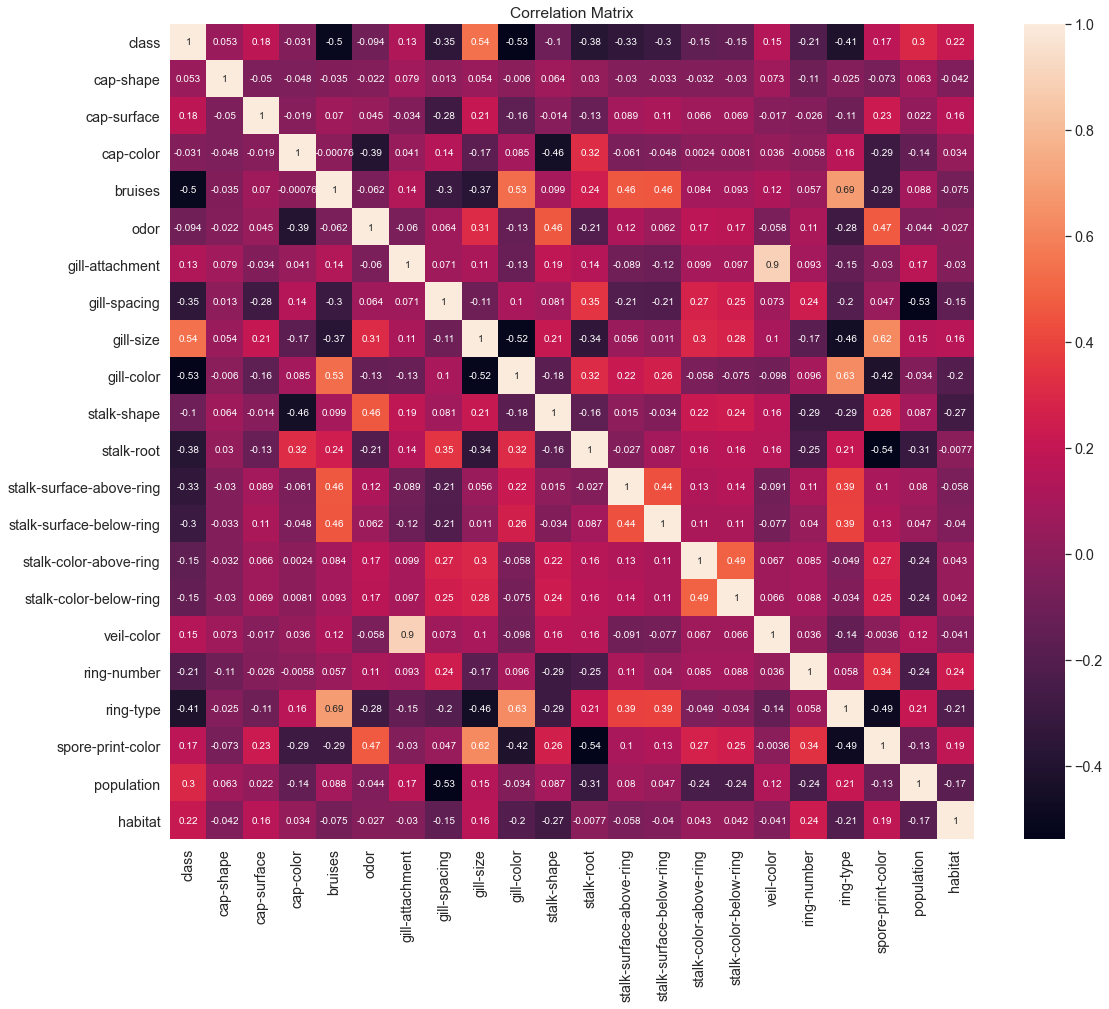

In [14]:
corr_value = df_mushroomsData_encoded.corr()
fig, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corr_value, annot=True, annot_kws={"size": 10})
ax.set(title='Correlation Matrix')

- **Gill-attachment** and **Veil-color** are strongly correlated **(0.9)**
- **ring-type** is positively correlated to **bruises** & **gill-color**

<a id=section502></a>
### 5.2 Relation between Mushroom Properties

[Text(0, 0.5, 'Quantity'),
 Text(0.5, 0, 'Class'),
 Text(0.5, 1.0, 'Mushroom Quantity By Class')]

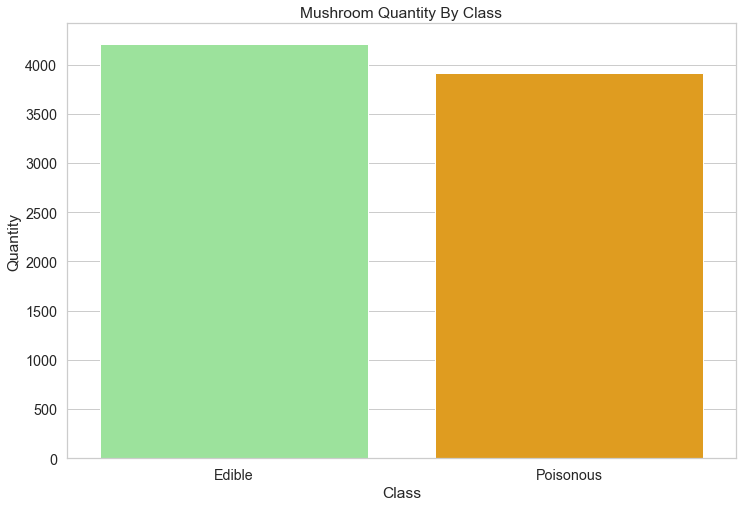

In [15]:
labels = ['Edible','Poisonous']
colorBar=['Lightgreen','Orange']
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(df_mushroomsData_encoded['class'], palette=colorBar)
ax.set_xticklabels(labels)
ax.set(title='Mushroom Quantity By Class',xlabel='Class',ylabel='Quantity')

- Edible mushrooms are ***slightly more*** than Poisonous mushrooms in given Dataset

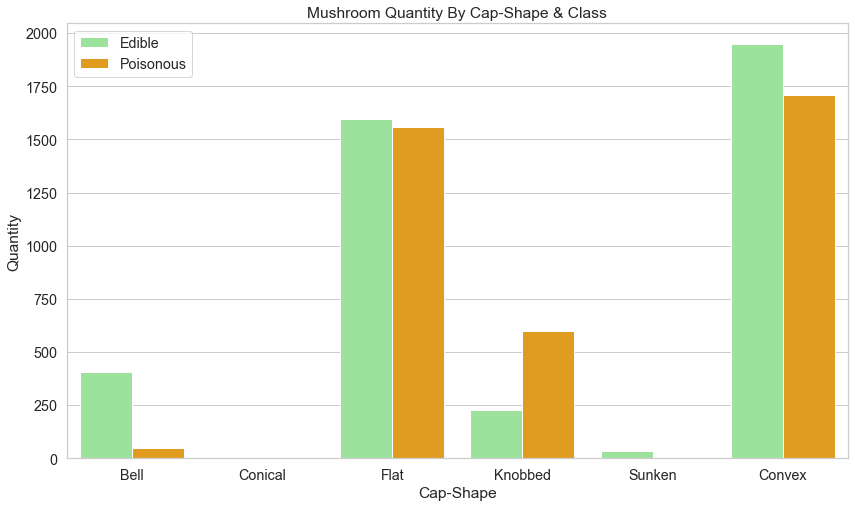

In [16]:
labels = ['Bell', 'Conical', 'Flat', 'Knobbed', 'Sunken', 'Convex']
colorBar=['Lightgreen','Orange']
fig, bx = plt.subplots(figsize=(14, 8))
sns.countplot('cap-shape', hue='class', palette=colorBar, data=df_mushroomsData_encoded)
bx.set_xticklabels(labels)
bx.set(title='Mushroom Quantity By Cap-Shape & Class',xlabel='Cap-Shape',ylabel='Quantity')
bx.legend(('Edible','Poisonous'), loc=0)

- There are more Flat & Convex Cap-shape Mushrooms.
- Mushrooms with Bell shaped caps are more likely to be edible

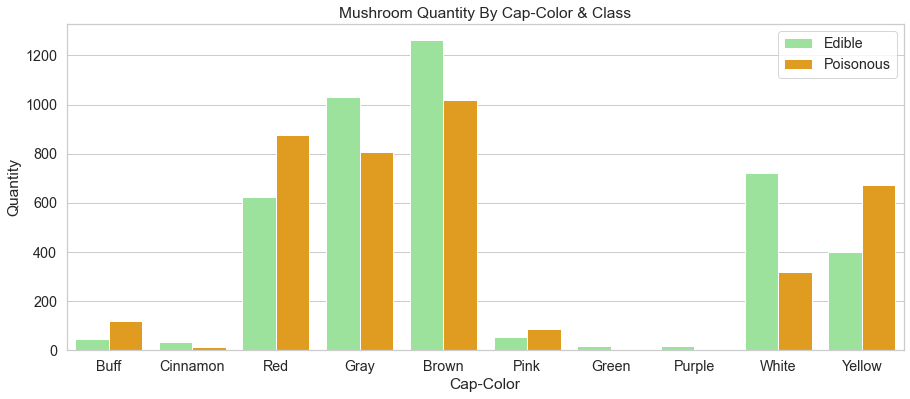

In [17]:
labels = ['Buff', 'Cinnamon', 'Red', 'Gray', 'Brown', 'Pink', 'Green', 'Purple', 'White', 'Yellow']
colorBar=['Lightgreen','Orange']
fig, bx = plt.subplots(figsize=(15, 6))
sns.countplot('cap-color', hue='class', palette=colorBar, data=df_mushroomsData_encoded)
bx.set_xticklabels(labels)
bx.set(title='Mushroom Quantity By Cap-Color & Class',xlabel='Cap-Color',ylabel='Quantity')
bx.legend(('Edible','Poisonous'), loc=0)

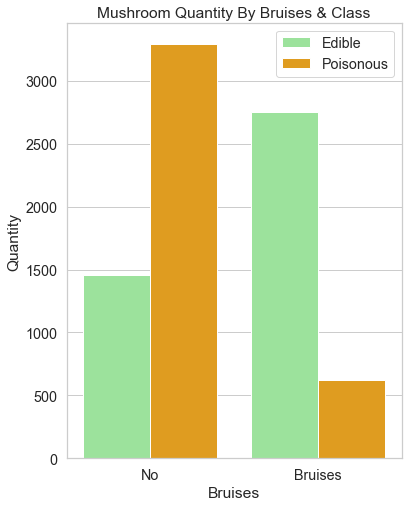

In [18]:
labels = ['No','Bruises']
colorBar=['Lightgreen','Orange']
fig, bx = plt.subplots(figsize=(6, 8))
sns.countplot('bruises', hue='class', palette=colorBar, data=df_mushroomsData_encoded)
bx.set_xticklabels(labels)
bx.set(title='Mushroom Quantity By Bruises & Class',xlabel='Bruises',ylabel='Quantity')
bx.legend(('Edible','Poisonous'), loc=0)

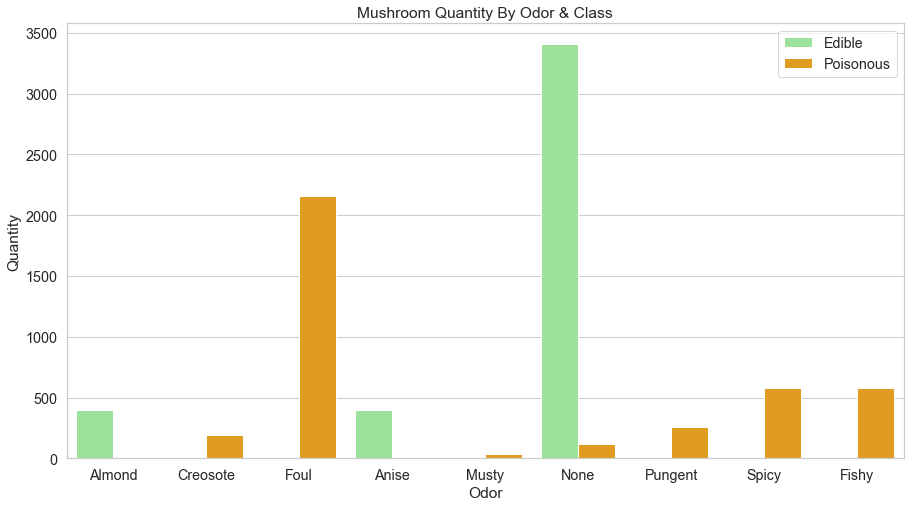

In [19]:
# odor
labels = ['Almond', 'Creosote', 'Foul', 'Anise', 'Musty', 'None', 'Pungent', 'Spicy', 'Fishy']
colorBar=['Lightgreen','Orange']
fig, bx = plt.subplots(figsize=(15,8))
sns.countplot('odor', hue='class', palette=colorBar, data=df_mushroomsData_encoded)
bx.set_xticklabels(labels)
bx.set(title='Mushroom Quantity By Odor & Class',xlabel='Odor',ylabel='Quantity')
bx.legend(('Edible','Poisonous'), loc=0)

- It can be clearly concluded that mushrooms without odor are Edible
- Mushrooms with Almond & Anise odor are also Edible
- If any other smell is coming from Mushrooms the it wil be poisonous.

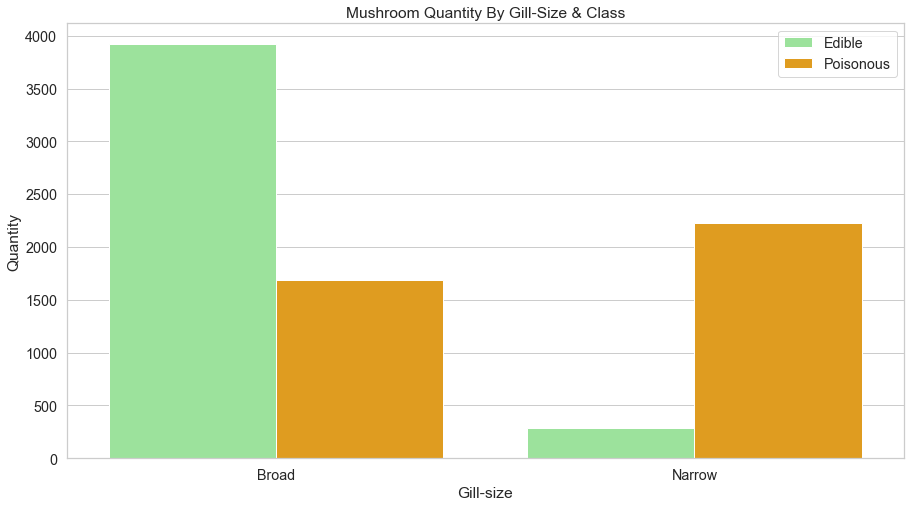

In [20]:
labels = ['Broad', 'Narrow']
colorBar=['Lightgreen','Orange']
fig, bx = plt.subplots(figsize=(15,8))
sns.countplot('gill-size', hue='class', palette=colorBar, data=df_mushroomsData_encoded)
bx.set_xticklabels(labels)
bx.set(title='Mushroom Quantity By Gill-Size & Class',xlabel='Gill-size',ylabel='Quantity')
bx.legend(('Edible','Poisonous'), loc=0)

- Mushrooms with Narrow Gill size are most likely Poisonous.

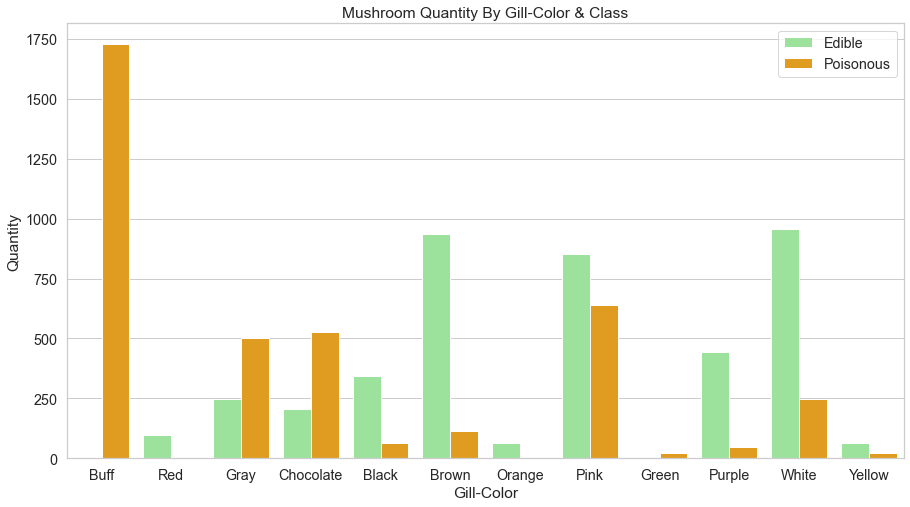

In [21]:
labels = ['Buff', 'Red', 'Gray', 'Chocolate', 'Black', 'Brown', 'Orange', 'Pink', 'Green', 'Purple', 'White', 'Yellow']
colorBar=['Lightgreen','Orange']
fig, bx = plt.subplots(figsize=(15,8))
sns.countplot('gill-color', hue='class', palette=colorBar, data=df_mushroomsData_encoded)
bx.set_xticklabels(labels)
bx.set(title='Mushroom Quantity By Gill-Color & Class',xlabel='Gill-Color',ylabel='Quantity')
bx.legend(('Edible','Poisonous'), loc=0)

- Mushrooms with **Buff** gill-color are Poisonous
- Mushrooms with **Brown** & **White** gill-color are Edible

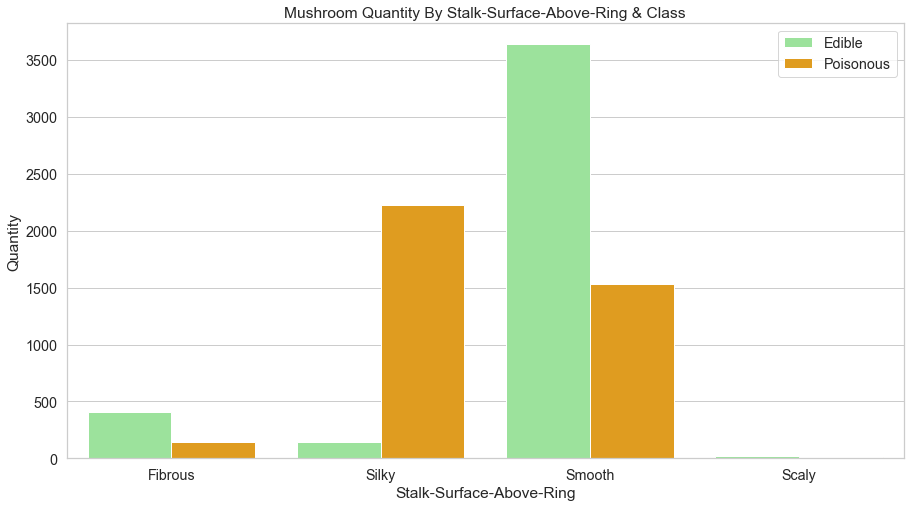

In [22]:
labels = ['Fibrous','Silky','Smooth','Scaly']
colorBar=['Lightgreen','Orange']
fig, bx = plt.subplots(figsize=(15,8))
sns.countplot('stalk-surface-above-ring', hue='class', palette=colorBar, data=df_mushroomsData_encoded)
bx.set_xticklabels(labels)
bx.set(title='Mushroom Quantity By Stalk-Surface-Above-Ring & Class',xlabel='Stalk-Surface-Above-Ring',ylabel='Quantity')
bx.legend(('Edible','Poisonous'), loc=0)

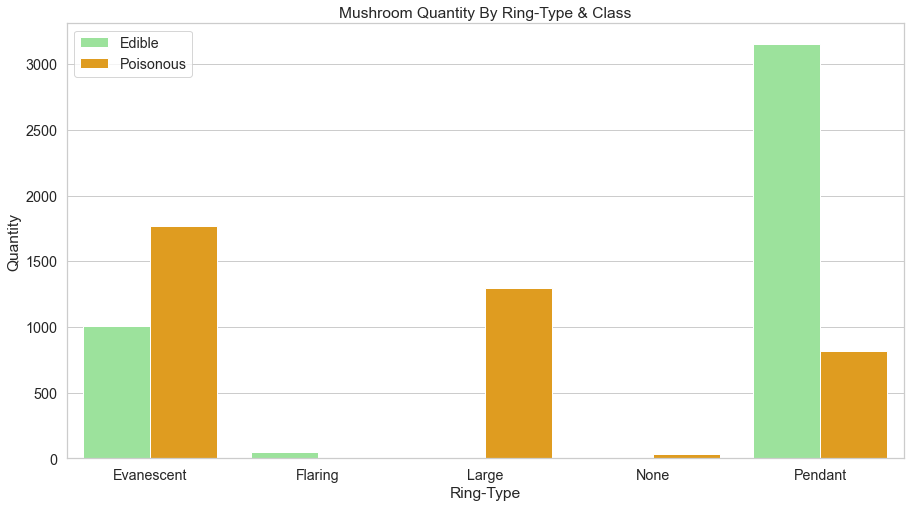

In [23]:
labels = ['Evanescent', 'Flaring', 'Large', 'None', 'Pendant']
colorBar=['Lightgreen','Orange']
fig, bx = plt.subplots(figsize=(15,8))
sns.countplot('ring-type', hue='class', palette=colorBar, data=df_mushroomsData_encoded)
bx.set_xticklabels(labels)
bx.set(title='Mushroom Quantity By Ring-Type & Class',xlabel='Ring-Type',ylabel='Quantity')
bx.legend(('Edible','Poisonous'), loc=0)

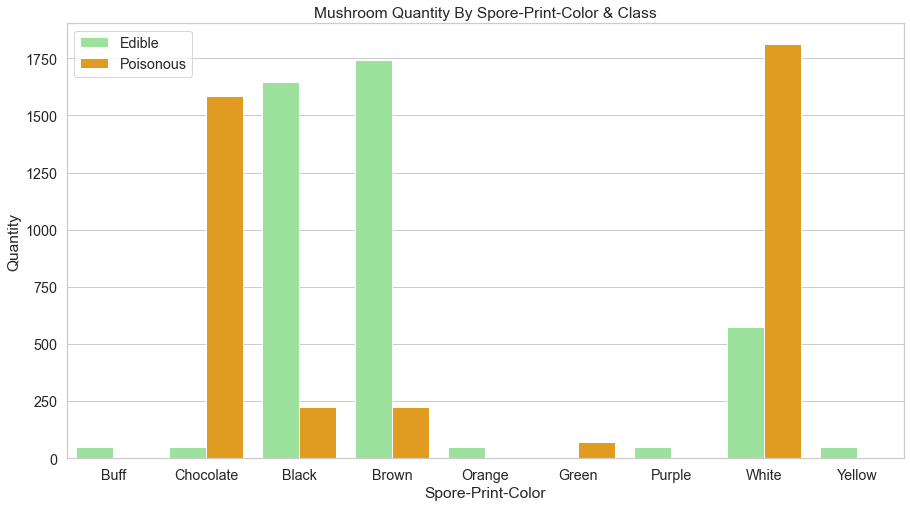

In [24]:
labels = ['Buff', 'Chocolate', 'Black', 'Brown', 'Orange', 'Green', 'Purple', 'White', 'Yellow']
colorBar=['Lightgreen','Orange']
fig, bx = plt.subplots(figsize=(15,8))
sns.countplot('spore-print-color', hue='class', palette=colorBar, data=df_mushroomsData_encoded)
bx.set_xticklabels(labels)
bx.set(title='Mushroom Quantity By Spore-Print-Color & Class',xlabel='Spore-Print-Color',ylabel='Quantity')
bx.legend(('Edible','Poisonous'), loc=0)

Text(0.5, 1.0, 'Mushrooms Population: Pie Chart')

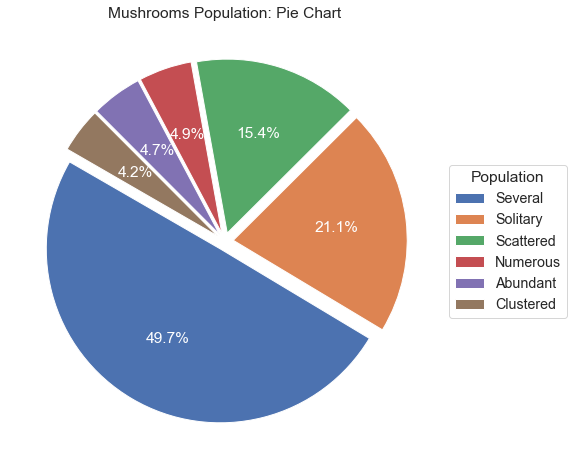

In [25]:
labels = ['Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered']
fig, ax = plt.subplots(figsize=(15,8))
wedges, texts, autotexts = ax.pie(df_mushroomsData_encoded['population'].value_counts(),explode=[0.05,0.05,0.05,0.05,0.05,0.05],autopct='%3.1f%%',shadow=False, startangle=150,textprops=dict(color="w"))
ax.legend(wedges, labels,
          title="Population",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("Mushrooms Population: Pie Chart")

Text(0.5, 1.0, 'Mushrooms Habitat: Pie Chart')

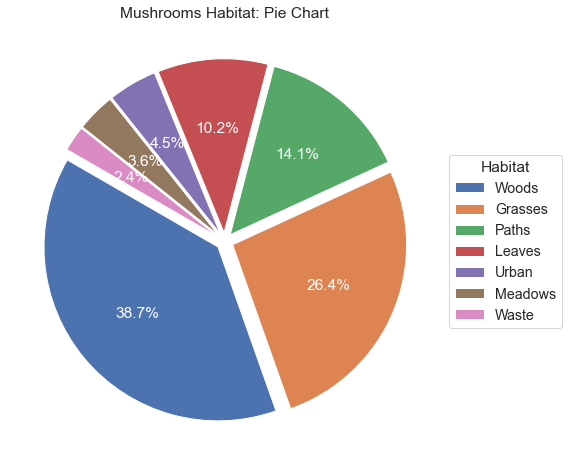

In [26]:
labels = ['Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste']
fig, ax = plt.subplots(figsize=(15,8))
wedges, texts, autotexts = ax.pie(df_mushroomsData_encoded['habitat'].value_counts(),explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05],autopct='%3.1f%%',shadow=False, startangle=150,textprops=dict(color="w"))
ax.legend(wedges, labels,
          title="Habitat",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("Mushrooms Habitat: Pie Chart")

------------------------------------------------------------------------

<a id=section6></a>
## 6. Data train/test split

<a id=section601></a>
### 6.1 Split Dataset into X & Y variables

- We will predict whether the mushroom is **Edible** or **Poisonous**, so **Class** will be our Target Variable **Y**.
- Except **Class**, all other columns are Explanatory variables hence they will be **X**.

In [27]:
X = df_mushroomsData_encoded.loc[:,df_mushroomsData_encoded.columns != 'class']
Y = df_mushroomsData_encoded.loc[:,['class']]

In [28]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1


In [29]:
Y.head()

,class
0,1
1,0
2,0
3,1
4,0


<a id=section602></a>
### 6.2 Train-Test Split

- Splitting the data in 80/20, 80% Training set and 20% Test set

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

--------------------------------------------

<a id=section7></a>
## 7. Modeling using scikit learn 

<a id=section701></a>
### 7.1 Logistic Regression

<a id=section70101></a>
#### 7.1.1 Model Creation

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [32]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
logReg = LogisticRegression()

logReg.fit(X_train_scaled,Y_train)
Y_train_predict = logReg.predict(X_train_scaled)
Y_test_predict = logReg.predict(X_test_scaled)

<a id=section70102></a>
#### 7.1.2 Model Evaluation

#### Accuracy Score

In [34]:
accu_test_LR = accuracy_score(Y_test,Y_test_predict)
accu_train_LR = accuracy_score(Y_train,Y_train_predict)

In [35]:
print('Test Accuracy:',accu_test_LR)
print('Train Accuracy:',accu_train_LR)

Test Accuracy: 0.9526153846153846
Train Accuracy: 0.9530697030312356


#### Intercept & Coefficients Value for Logistic Regression Model

In [36]:
print('intercept:',logReg.intercept_)
print('Coefficients: ',logReg.coef_)

intercept: [-1.58123567]
Coefficients:  [[ 0.01248347  0.5073375  -0.25324258 -0.03294878 -1.87711426 -0.83348225
  -4.81407938  5.68770772 -0.56406791  0.10586062 -4.02421597 -4.78850194
   0.1008946  -0.3286457  -0.11976503  5.92028915  0.73657355  3.98344984
  -0.4735649  -0.89890162  0.11875713]]


In [37]:
pred1 = np.where(logReg.predict_proba(X_test_scaled)[:,1]>0.42,1,0)
print('Accuracy score for test data is:', accuracy_score(Y_test,pred1))

Accuracy score for test data is: 0.9587692307692308


#### Confusion Matrix

In [38]:
confusionMatrix_LR = confusion_matrix(Y_test,Y_test_predict)
confusionMatrix_LR = pd.DataFrame(confusionMatrix_LR,columns=['Predicted Edible','Predicted Poisonous'], index=['Actual Edible','Actual Poisonous'])
confusionMatrix_LR

,Predicted Edible,Predicted Poisonous
Actual Edible,787,33
Actual Poisonous,44,761


In [39]:
# Confusion Matrix Score
print('Confusion Matrix Score:',(787+761)/(787+761+33+44))

Confusion Matrix Score: 0.9526153846153846


#### Precision Score

In [40]:
precisionSc_test_LR = precision_score(Y_test,Y_test_predict)
precisionSc_train_LR = precision_score(Y_train,Y_train_predict)
print('Precision Score for Test set:',precisionSc_test_LR)
print('Precision Score for Train set:',precisionSc_train_LR)

Precision Score for Test set: 0.9584382871536524
Precision Score for Train set: 0.953751617076326


#### Recall Score

In [41]:
recallSc_test_LR = recall_score(Y_test,Y_test_predict)
recallSc_train_LR = recall_score(Y_train,Y_train_predict)
print('Recall Score for Test set:',recallSc_test_LR)
print('Recall Score for Train set:',recallSc_train_LR)

Recall Score for Test set: 0.9453416149068323
Recall Score for Train set: 0.9479267116682739


#### F1 Score

In [42]:
f1Sc_test_LR = f1_score(Y_test,Y_test_predict)
f1Sc_train_LR = f1_score(Y_train,Y_train_predict)
print('F1 Score for Test set:',f1Sc_test_LR)
print('F1 Score for Train set:',f1Sc_train_LR)

F1 Score for Test set: 0.9518449030644153
F1 Score for Train set: 0.9508302434305981


---------------------------------------------------------------------

<a id=section702></a>
### 7.2 Decision Tree Classifier

<a id=section70201></a>
#### 7.2.1 Model Creation

In [43]:
from sklearn.tree import DecisionTreeClassifier
decTreeC = DecisionTreeClassifier(criterion='gini',random_state=1)

In [44]:
decTreeC.fit(X_train_scaled, Y_train)
Y_test_pred_dt = decTreeC.predict(X_test_scaled)
Y_train_pred_dt =decTreeC.predict(X_train_scaled)

<a id=section70202></a>
#### 7.2.2 Model Evaluation

#### Accuracy Score

In [45]:
accu_test_dt = accuracy_score(Y_test,Y_test_pred_dt)
accu_train_dt = accuracy_score(Y_train,Y_train_pred_dt)

In [46]:
print('Test:',accu_test_dt)
print('Train:',accu_train_dt)

Test: 1.0
Train: 1.0


#### Confusion Matrix

In [47]:
confusion_matrix_dt = confusion_matrix(Y_test,Y_test_pred_dt)
confusion_matrix_dt = pd.DataFrame(confusion_matrix_dt,columns=['Predicted Edible','Predicted Poisonous'], index=['Actual Edible','Actual Poisonous'])

In [48]:
confusion_matrix_dt

,Predicted Edible,Predicted Poisonous
Actual Edible,820,0
Actual Poisonous,0,805


In [49]:
print('Confusion Matrix score: ',(820+805)/(820+0+0+805))

Confusion Matrix score:  1.0


#### Precision Score

In [50]:
precisionSc_test_DT = precision_score(Y_test,Y_test_pred_dt)
precisionSc_train_DT = precision_score(Y_train,Y_train_pred_dt)
print('Precision Score for Test set:',precisionSc_test_DT)
print('Precision Score for Train set:',precisionSc_train_DT)

Precision Score for Test set: 1.0
Precision Score for Train set: 1.0


#### Recall Score

In [51]:
recallSc_test_DT = recall_score(Y_test,Y_test_pred_dt)
recallSc_train_DT = recall_score(Y_train,Y_train_pred_dt)
print('Recall Score for Test set:',recallSc_test_DT)
print('Recall Score for Train set:',recallSc_train_DT)

Recall Score for Test set: 1.0
Recall Score for Train set: 1.0


#### F1 Score

In [52]:
f1Sc_test_DT = f1_score(Y_test,Y_test_pred_dt)
f1Sc_train_DT = f1_score(Y_train,Y_train_pred_dt)
print('F1 Score for Test set:',f1Sc_test_DT)
print('F1 Score for Train set:',f1Sc_train_DT)

F1 Score for Test set: 1.0
F1 Score for Train set: 1.0


<a id=section70203></a>
#### 7.2.3 Visualize Decision Tree

In [53]:
import sys
# !{sys.executable} -m pip install graphviz
!{sys.executable} -m pip install pydotplus
!{sys.executable} -m pip install Ipython

!{sys.executable} -m pip install pydot

In [54]:
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

export_graphviz(decTreeC, 
                out_file='decision_tree.dot',
                feature_names= X.columns, 
                rounded=True, 
                precision=4, 
                node_ids=True, 
                proportion=True,
                filled=True)

In [55]:
(graph,) = pydot.graph_from_dot_file('decision_tree.dot')

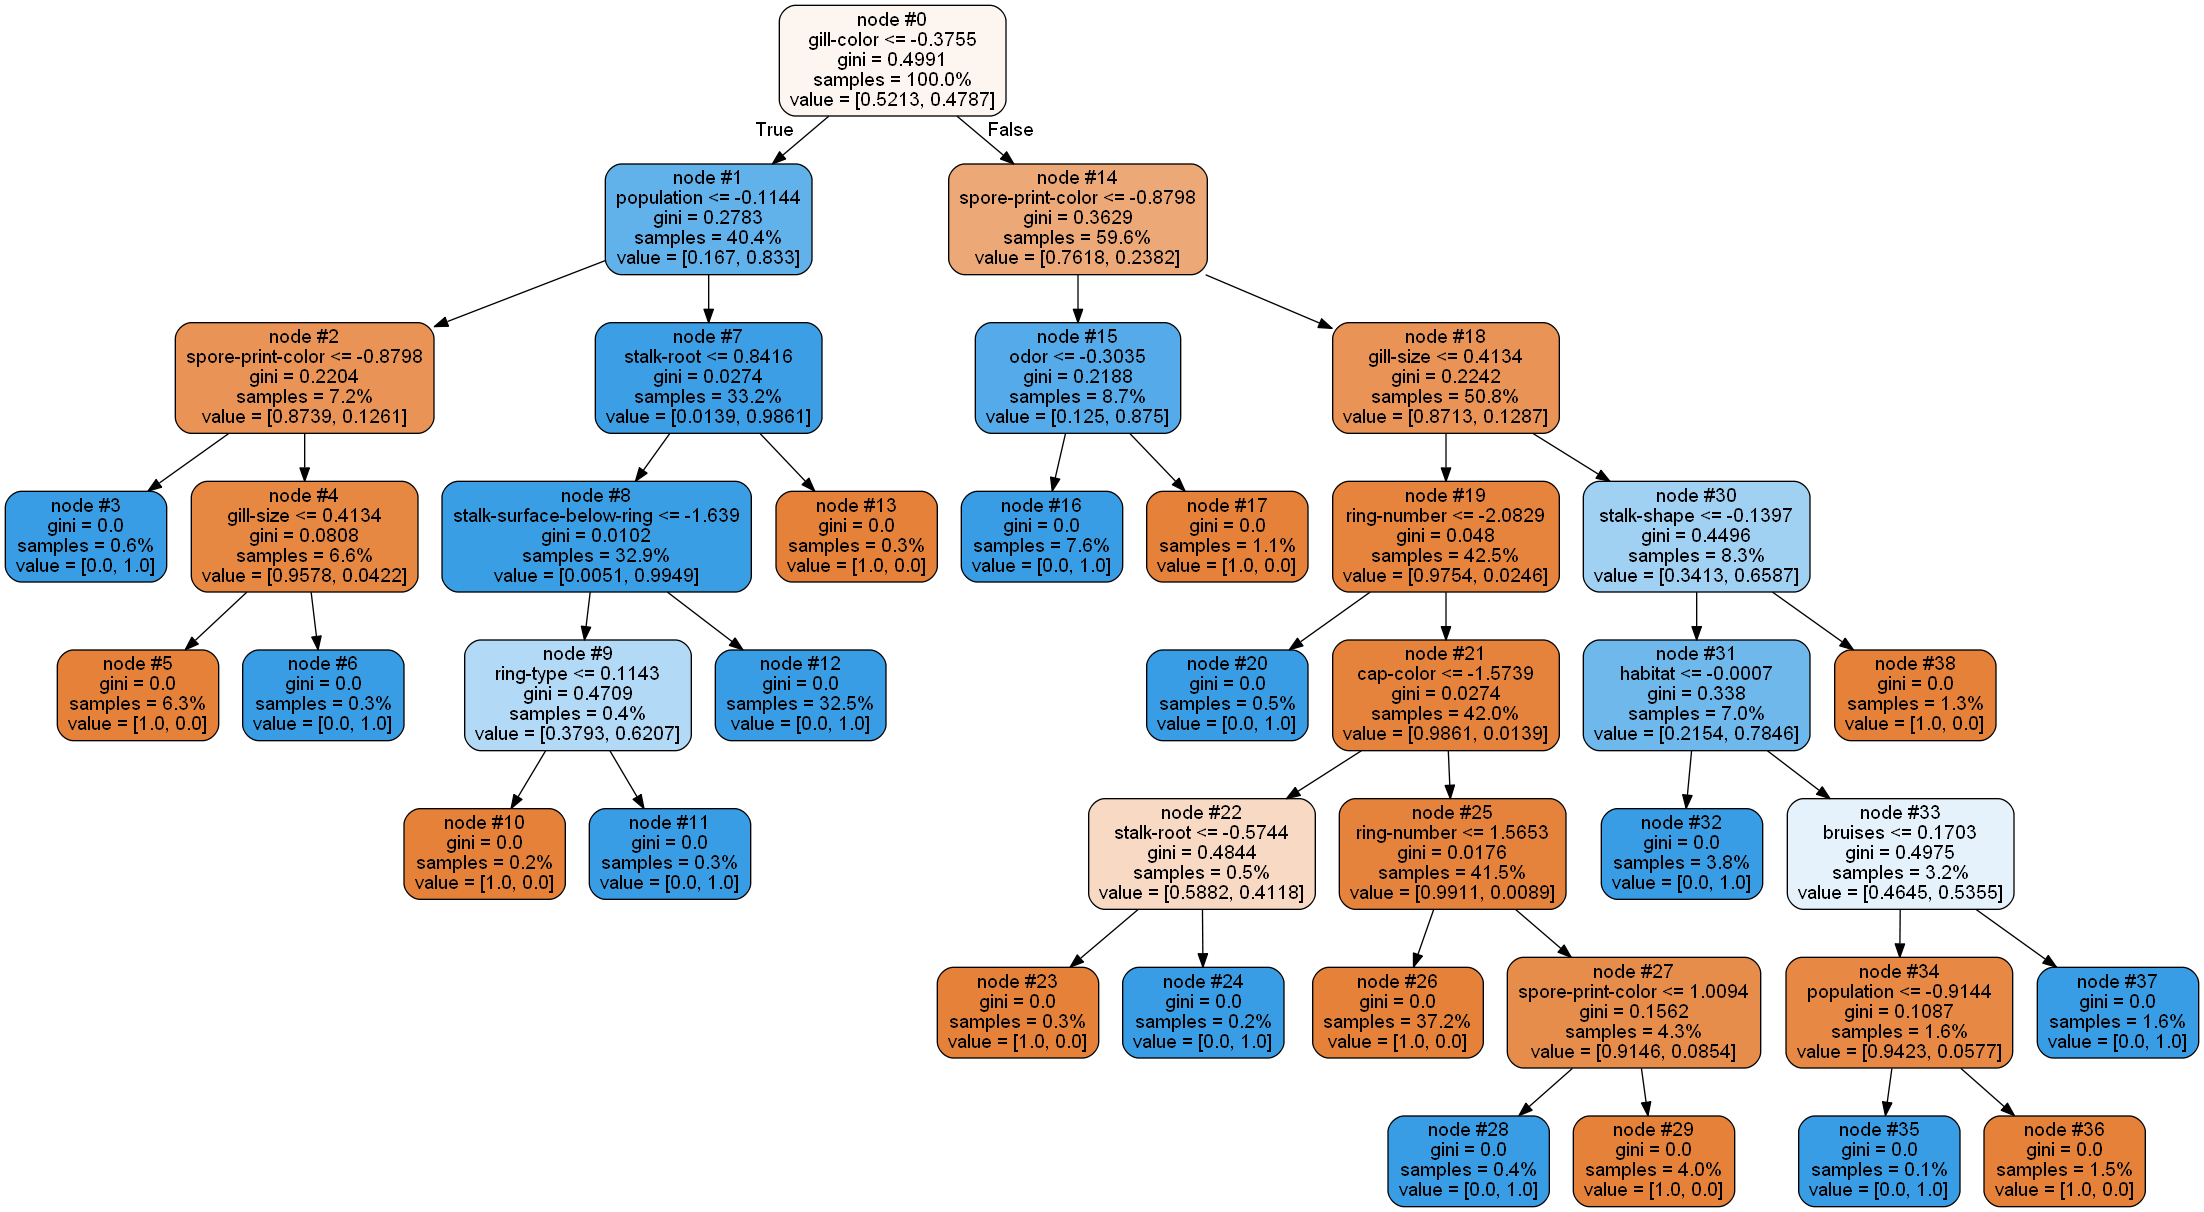

In [56]:
graph.write_png('decision_tree.png')
Image(filename='decision_tree.png')

---------------------------------------------------------------------

<a id=section703></a>
### 7.3 Random Forest Classifier

<a id=section70301></a>
#### 7.3.1 Model Creation

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=1)

In [58]:
rf_model.fit(X_train_scaled,Y_train)
Y_test_pred_rf = rf_model.predict(X_test_scaled)
Y_train_pred_rf = rf_model.predict(X_train_scaled)

<a id=section70302></a>
#### 7.3.2 Model Evaluation

#### Accuracy Score

In [59]:
accu_test_rf = accuracy_score(Y_test,Y_test_pred_rf)
accu_train_rf = accuracy_score(Y_train,Y_train_pred_rf)

In [60]:
print('Test Accuracy',accu_test_rf)
print('Train Accuracy',accu_train_rf)

Test Accuracy 1.0
Train Accuracy 1.0


#### Confusion Matrix

In [61]:
confusion_matrix_rf = confusion_matrix(Y_test,Y_test_pred_rf)
confusion_matrix_rf = pd.DataFrame(confusion_matrix_rf,columns=['Predicted Edible','Predicted Poisonous'], index=['Actual Edible','Actual Poisonous'])
confusion_matrix_rf

,Predicted Edible,Predicted Poisonous
Actual Edible,820,0
Actual Poisonous,0,805


In [62]:
print('Confusion Matrix Score: ',(820+805)/(820+0+0+805))

Confusion Matrix Score:  1.0


#### Precision Score

In [63]:
precisionSc_test_RF = precision_score(Y_test,Y_test_pred_rf)
precisionSc_train_RF = precision_score(Y_train,Y_train_pred_rf)
print('Precision Score for Test set:',precisionSc_test_RF)
print('Precision Score for Train set:',precisionSc_train_RF)

Precision Score for Test set: 1.0
Precision Score for Train set: 1.0


#### Recall Score

In [64]:
recallSc_test_RF = recall_score(Y_test,Y_test_pred_rf)
recallSc_train_RF = recall_score(Y_train,Y_train_pred_rf)
print('Recall Score for Test set:',recallSc_test_RF)
print('Recall Score for Train set:',recallSc_train_RF)

Recall Score for Test set: 1.0
Recall Score for Train set: 1.0


#### F1 Score

In [65]:
f1Sc_test_RF = f1_score(Y_test,Y_test_pred_rf)
f1Sc_train_RF = f1_score(Y_train,Y_train_pred_rf)
print('F1 Score for Test set:',f1Sc_test_RF)
print('F1 Score for Train set:',f1Sc_train_RF)

F1 Score for Test set: 1.0
F1 Score for Train set: 1.0


------------------------------------------------------------------

<a id=section704></a>
### 7.4 Decision Tree with GridSearch

<a id=section70401></a>
#### 7.4.1 Model Creation with Hyper-Parameter Tuning

In [66]:
from sklearn.model_selection import GridSearchCV

decTreeCl = DecisionTreeClassifier(random_state=0)
tree_params = [{'criterion':['gini','entropy'],'max_depth':range(2,60),'max_features':['sqrt','log2', None]}]

gridSearch = GridSearchCV(decTreeCl,tree_params,cv=10,refit='AUC')
gridSearch.fit(X_train,Y_train)

Y_test_pred_GSDT = gridSearch.predict(X_test)
Y_train_pred_GSDT = gridSearch.predict(X_train)

<a id=section70402></a>
#### 7.4.2 Model Evaluation

#### Accuracy Score

In [67]:
accu_test_GSDT = accuracy_score(Y_test,Y_test_pred_GSDT)
accu_train_GSDT = accuracy_score(Y_train,Y_train_pred_GSDT)
print('Accuracy Score for Decision Tree using GridSearch:',accu_test_GSDT)
print('Accuracy Score for Decision Tree Train set using GridSearch:',accu_train_GSDT)

Accuracy Score for Decision Tree using GridSearch: 1.0
Accuracy Score for Decision Tree Train set using GridSearch: 1.0


#### Confusion Matrix

In [68]:
confusionMatrix_GSDT = confusion_matrix(Y_test,Y_test_pred_GSDT)
confusionMatrix_GSDT = pd.DataFrame(confusionMatrix_GSDT, columns=['Predicted Edible','Predicted Poisonous'], index=['Actual Edible','Actual Poisonous'])

confusionMatrix_GSDT

,Predicted Edible,Predicted Poisonous
Actual Edible,820,0
Actual Poisonous,0,805


In [69]:
print('Confusion Matrix Score: ',(820+805)/(820+0+0+805))

Confusion Matrix Score:  1.0


#### Precision Score

In [70]:
precisionSc_test_GSDT = precision_score(Y_test,Y_test_pred_GSDT)
precisionSc_train_GSDT = precision_score(Y_train,Y_train_pred_GSDT)
print('Precision Score for Test set:',precisionSc_test_GSDT)
print('Precision Score for Train set:',precisionSc_train_GSDT)

Precision Score for Test set: 1.0
Precision Score for Train set: 1.0


#### Recall Score

In [71]:
recallSc_test_GSDT = recall_score(Y_test,Y_test_pred_GSDT)
recallSc_train_GSDT = recall_score(Y_train,Y_train_pred_GSDT)
print('Recall Score for Test set:',recallSc_test_GSDT)
print('Recall Score for Train set:',recallSc_train_GSDT)

Recall Score for Test set: 1.0
Recall Score for Train set: 1.0


#### F1 Score

In [72]:
f1Sc_test_GSDT = f1_score(Y_test,Y_test_pred_GSDT)
f1Sc_train_GSDT = f1_score(Y_train,Y_train_pred_GSDT)
print('F1 Score for Test set:',f1Sc_test_GSDT)
print('F1 Score for Train set:',f1Sc_train_GSDT)

F1 Score for Test set: 1.0
F1 Score for Train set: 1.0


-------------------------------------------------------------------------------------------

<a id=section705></a>
### 7.5 Random Forest with RandomizedSearch

<a id=section70501></a>
#### 7.5.1 Model Creation with Hyper-Parameter Tuning

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

randomFor_model = RandomForestClassifier(random_state=1)
params = {"max_depth": range(2,7),
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }

search_iter = 50
random_search_model = RandomizedSearchCV(randomFor_model,param_distributions=params,n_iter=search_iter)

In [74]:
random_search_model.fit(X_train,Y_train)
Y_test_pred_RFS = random_search_model.predict(X_test)
Y_train_pred_RFS = random_search_model.predict(X_train)

<a id=section70502></a>
#### 7.5.2 Model Evaluation

#### Accuracy Score

In [75]:
accu_test_RFS = accuracy_score(Y_test,Y_test_pred_RFS)
accu_train_RFS = accuracy_score(Y_train,Y_train_pred_RFS)
print('Accuracy Score, Test Set:',accu_test_RFS)
print('Accuracy Score, Train Set:',accu_train_RFS)

Accuracy Score, Test Set: 0.9993846153846154
Accuracy Score, Train Set: 0.9989229112171103


#### Confusion Matrix

In [76]:
confusion_matrix_RFS = confusion_matrix(Y_test,Y_test_pred_RFS)
confusion_matrix_RFS = pd.DataFrame(confusion_matrix_RFS,columns=['Predicted Edible','Predicted Poisonous'], index=['Actual Edible','Actual Poisonous'])
confusion_matrix_RFS

,Predicted Edible,Predicted Poisonous
Actual Edible,819,1
Actual Poisonous,0,805


In [77]:
print('Confusion Matrix: ',(819+805)/(819+1+0+805))

Confusion Matrix:  0.9993846153846154


#### Precision Score

In [78]:
precisionSc_test_RFS = precision_score(Y_test,Y_test_pred_RFS)
precisionSc_train_RFS = precision_score(Y_train,Y_train_pred_RFS)
print('Precision Score for Test set:',precisionSc_test_RFS)
print('Precision Score for Train set:',precisionSc_train_RFS)

Precision Score for Test set: 0.9987593052109182
Precision Score for Train set: 0.9977549711353432


#### Recall Score

In [79]:
recallSc_test_RFS = recall_score(Y_test,Y_test_pred_RFS)
recallSc_train_RFS = recall_score(Y_train,Y_train_pred_RFS)
print('Recall Score for Test set:',recallSc_test_RFS)
print('Recall Score for Train set:',recallSc_train_RFS)

Recall Score for Test set: 1.0
Recall Score for Train set: 1.0


#### F1 Score

In [80]:
f1Sc_test_RFS = f1_score(Y_test,Y_test_pred_RFS)
f1Sc_train_RFS = f1_score(Y_train,Y_train_pred_RFS)
print('F1 Score for Test set:',f1Sc_test_RFS)
print('F1 Score for Train set:',f1Sc_train_RFS)

F1 Score for Test set: 0.9993792675356922
F1 Score for Train set: 0.9988762241130197


---------------------------------------------

<a id=section8></a>
## 8. Comparison between AUC-ROC Curve for Different Models

<a id=section801></a>
### 8.1 Logistic Regression - AUC-ROC Curve

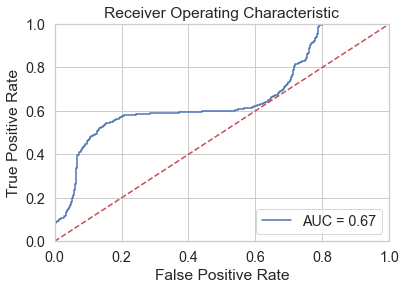

In [81]:
from sklearn import metrics
probs_LR = logReg.predict_proba(X_test)
pred_LR = probs_LR[:,1]
fpr_lr, tpr_lr, threshold = metrics.roc_curve(Y_test, pred_LR)
roc_auc = metrics.auc(fpr_lr, tpr_lr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

-------------------------------------------------

<a id=section702></a>
### 8.2 Decision Tree - AUC-ROC Curve

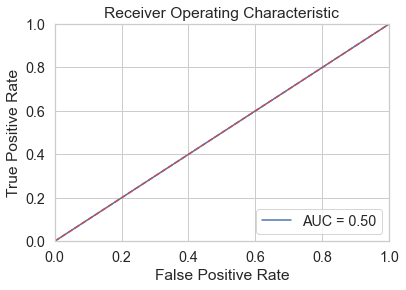

In [82]:
probs_DT = decTreeC.predict_proba(X_test)
pred_DT = probs_DT[:,1]
fpr_dt, tpr_dt, threshold = metrics.roc_curve(Y_test, pred_DT)
roc_auc = metrics.auc(fpr_dt, tpr_dt)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_dt, tpr_dt, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

---------------------------------

<a id=section803></a>
### 8.3 Random Forest - AUC-ROC Curve

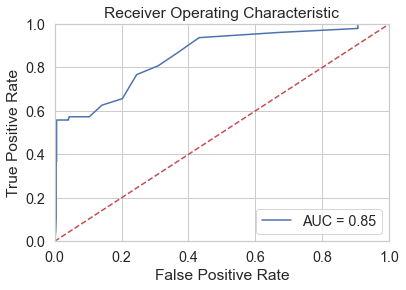

In [83]:
probs_RF = rf_model.predict_proba(X_test)
pred_RF = probs_RF[:,1]
fpr_rf, tpr_rf, threshold = metrics.roc_curve(Y_test, pred_RF)
roc_auc = metrics.auc(fpr_rf, tpr_rf)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_rf, tpr_rf, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

--------------------------------------------

<a id=section804></a>
### 8.4 Decision Tree with Gridsearch - AUC-ROC Curve

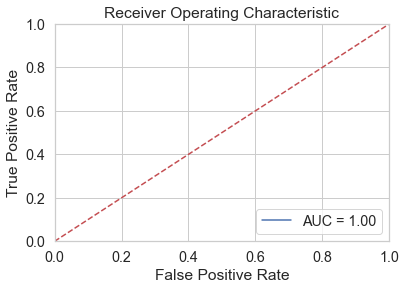

In [84]:
probs_DTC = gridSearch.predict_proba(X_test)
pred_DTC = probs_DTC[:,1]
fpr_dtc, tpr_dtc, threshold = metrics.roc_curve(Y_test, pred_DTC)
roc_auc = metrics.auc(fpr_dtc, tpr_dtc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_dtc, tpr_dtc, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

----------------------------------------------

<a id=section805></a>
### 8.5 Random Forest with RandomizedSearch - AUC-ROC Curve

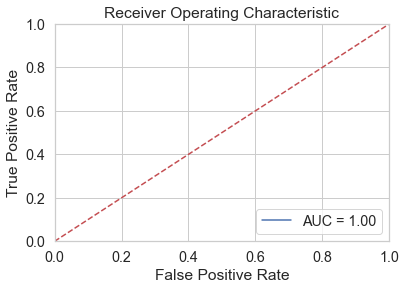

In [85]:
probs_rfs = random_search_model.predict_proba(X_test)
pred_rfs = probs_rfs[:,1]
fpr_rfs, tpr_rfs, threshold = metrics.roc_curve(Y_test, pred_rfs)
roc_auc = metrics.auc(fpr_rfs, tpr_rfs)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_rfs, tpr_rfs, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

--------------------------------------------

<a id=section9></a>
## 9. Conclusions

- The important features of mushrooms to identify that it is safe to eat are as follows :-
    - Odor – None, Almond & Anise are edible and creosote, foul, musty, pungent, spicy and fishy are poisonous.
    - Gill Size – Narrow are Poisonous.
    - Rings – Whether large or absent.
    - Spore print colour – Brown and Black are mostly edible & White, Chocolate are poisonous
    - Population – Available in several places.
    - Habitat – Grown on grasses, leaves, woods, path and urban.

- From the comparison between scores of different evaluation metrics, we can say that following ML algorithms are best fit 
    - Decision Tree using GridSearchCV for Hyper-Parameter Tuning
    - Random Forest with RandomizedSearchCV for Hyper-Parameter Tuning